# Érdekességek a matematika alkalmazásaiból

## Klasszifikáció kiértékelése

*Gyarmathy Zsófia & Varasdi Károly*

### Jupyter notebook és Python környezet felállítás, csomagimportok

In [2]:
## Képmegjelenítéshez a notebookban:
from IPython.core.display import Image, display #használat: display(Image(filename='image.png'))

In [47]:
import numpy as np

In [69]:
from sklearn.metrics import confusion_matrix
## osszekeveresi_matrix = confusion_matrix(actual, predicted)
## tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()

from sklearn.metrics import accuracy_score 
## acc = accuracy_score(actual, predicted)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
## klasszifikacios_kiertekeles = classification_report(actual, predicted) 

### Összekeverési mátrix (confusion matrix)

Kezdetnek tekintsük a bináris kategorizáció esetét.

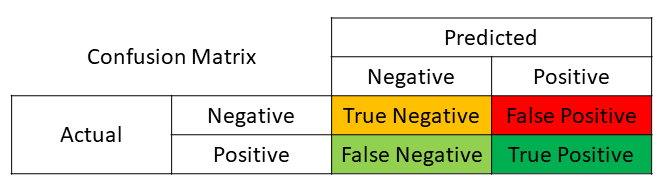

Forrás: https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019


In [29]:
display(Image('abrak/confmatrix.png', width=600))
print("Forrás: https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019")

* **TP (true positives, valódi pozitı́vok)**: azon adatpontok száma, amelyeket a rendszer helyesen pozitívnak ítélt.
* **TN (true negatives, valódi negatívok)**: azon adatpontok száma, amelyeket a rendszer helyesen negatívnak ítélt.
* **FP (false positives, téves pozitı́vok)** (= 1. típusú hiba): azon adatpontok száma, amelyeket a rendszer tévesen pozitívnak ítélt.
* **FN (false negatives, téves negatı́vok)** (= 2. típusú hiba): azon adatpontok száma, amelyeket a rendszer tévesen negatívnak ítélt.


#### Mérőszámok

##### Korrektség (accuracy, AC)
Az *accuracy* azt méri, hogy az összes esetből hányban történt a klasszifikáció a helyes módon:

$$\mathsf{accuracy} = \frac{TP + TN}{P + N} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [42]:
predikcio = [1, 0, 0, 0, 1, 1, 1]
tenyleges = [1, 1, 0, 0, 1, 0, 1]
eltalalta = [predikcio[i] == tenyleges[i] for i in range(len(predikcio))]

print("predikció:", predikcio)
print("tényleges:", tenyleges)
print("eltalálta:", eltalalta)

predikció: [1, 0, 0, 0, 1, 1, 1]
tényleges: [1, 1, 0, 0, 1, 0, 1]
eltalálta: [True, False, True, True, True, False, True]


In [36]:
osszekeveresi_matrix = confusion_matrix(tenyleges, predikcio)
tn, fp, fn, tp = osszekeveresi_matrix.ravel()
print("Confusion matrix:")
print("   0", "1")
print("   ---")
i = 0
for row in osszekeveresi_matrix:
    print(str(i) + ":", row[0], row[1])
    i += 1

Confusion matrix:
   0 1
   ---
0: 2 1
1: 1 3


Mennyi az accuracy?

In [44]:
acc_manual = eltalalta.count(True) / len(eltalalta)
acc_manual

0.7142857142857143

In [45]:
accuracy_score(tenyleges, predikcio)

0.7142857142857143

**Elég az accuracy a kiértékeléshez?**

In [74]:
egeszseges = np.ones(100000)
egeszseges[99000:] = 0

In [75]:
print("Egészségesek száma:", (egeszseges == 1).sum())
print("Betegek száma:", (egeszseges == 0).sum())

Egészségesek száma: 99000
Betegek száma: 1000


In [78]:
predikcio = np.ones(100000)

In [80]:
osszekeveresi_matrix = confusion_matrix(egeszseges, predikcio)
tn, fp, fn, tp = osszekeveresi_matrix.ravel()
print("Confusion matrix a betegség modellre:")
print("     0 \t", "1")
print("     --------------")
i = 0
for row in osszekeveresi_matrix:
    print(str(i) + ":  ", row[0], "\t", row[1])
    i += 1

Confusion matrix a betegség modellre:
     0 	 1
     --------------
0:   0 	 1000
1:   0 	 99000


In [85]:
accuracy_score(egeszseges, predikcio)

0.99

**Az adatpontok 99%-ában helyes eredményt ad a modell.** Elégedettek vagyunk-e?

In [88]:
f1_score(egeszseges, predikcio)

0.9949748743718593

##### Pontosság (precison)
A *precision* azt mutatja meg, hogy a rendszer által *helyesen* pozitívnak vélt adatpontok mekkora hányadát alkotják a rendszer által pozitı́vnak vélt adatpontok számosságának.

$$\textsf{precision} = \frac{TP}{TP + FP}$$


##### Felidézés (recall, sensitivity, true positive rate, TPR) 

A *recall* az az arány, ami azt mutatja, hogy az összes ténylegesen pozitívnak kategorizálandó adatpont mekkora részét osztályozta a rendszer helyesen pozitı́vnak.

$$\textsf{recall} = \frac{TP}{P} = \frac{TP}{TP + FN}$$


##### F-mérték (F1-score, F-score, F-measure)
Az F-mérték egy egységes kombinált érték, a pontosság és a felidézés harmonikus közepe:

$$\mathit{F1} = \frac{2}{ \frac{1}{\textsf{precision}} + \frac{1}{\textsf{recall}} } =
2 * \frac{(\textsf{precision} * \textsf{recall})}{(\textsf{precision} + \textsf{recall})}$$

#### Hamis pozitı́vok aránya (false positive rate, FPR)

A FPR az az arány, amely megmutatja, hogy a rendszer a valójában negatívnak kategorizálandó adatpontok mekkora részét osztályozta hibásan pozitívnak.

$$\mathit{FPR} = \frac{FP}{N} = \frac{FP}{TN + FP}$$


##### Valódi negatı́vok aránya (specificity, true negative rate, TNR)

A TNR a TPR érték "duálisa": azt mutatja, hogy azon adatpontok száma, amiket a rendszer helyes negatívnak
ítélt, hogy aránylik a ténylegesen negatívak számához.

$$\mathit{TNR} = \frac{TN}{N} = \frac{TN}{TN + FP}$$


#### Téves negatívok aránya (false negative rate, FNR)

A FNR az FPR érték "duálisa": megmutatja, hogy azon adatpontok száma, amiket a rendszer tévesen negatívnak ítélt hogy aránylik a ténylegesen pozitívak számához.

$$\mathit{FNR} = \frac{FN}{P} = \frac{FN}{TP + FN}$$
